#### Step 5: Train/Test Split**

In [1]:
# Read processed excel
import pandas as pd
df = pd.read_csv(r"D:\DATA SCIENCE\SCHOOL PROJECTS\CRYPTO TRADER\data\processed\crypto_labeled_features.csv")



## MAY ADD FEATURE COLS???**

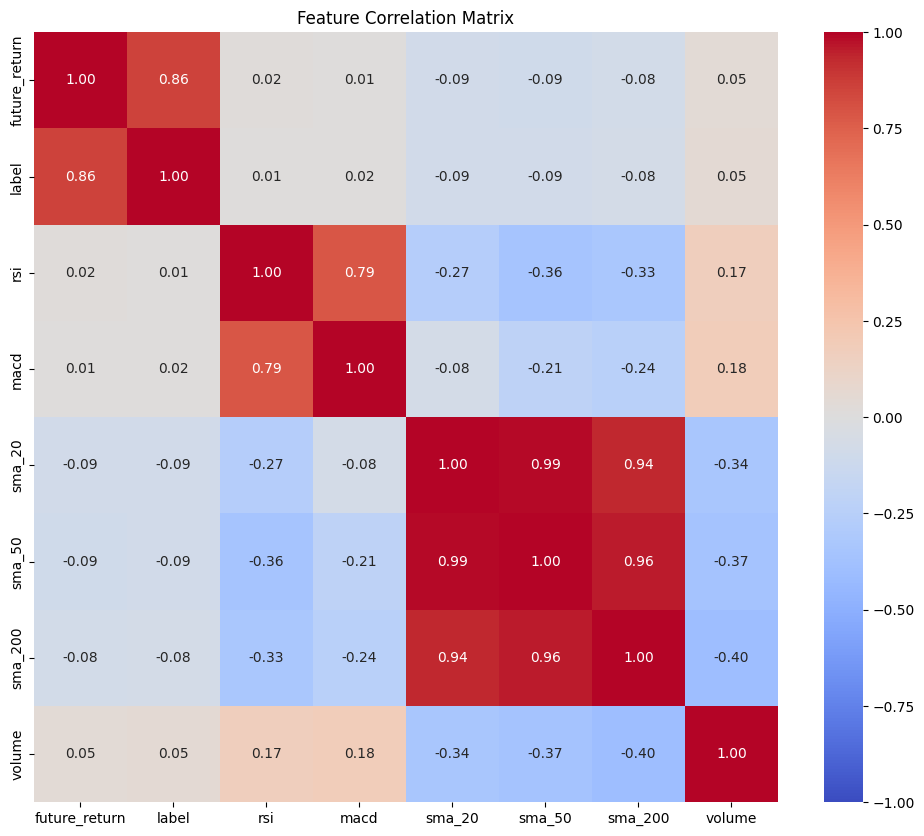

In [2]:
#Plotting a Feature Correlation Matrix to determine what columns to use for the model
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'future_return', 'label', 'rsi', 'macd', 'macd_hist',
    'sma_20', 'sma_50', 'sma_200', 'volatility', 'volume'
]

#Filtering the columns in the dataframe
existing_cols = [col for col in numeric_cols if col in df.columns]

plt.figure(figsize=(12, 10))
sns.heatmap(df[existing_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

In [3]:
# Define features and target

target_col = "label"  # column with your Buy/Sell/Hold labels
feature_cols = df.columns.difference([target_col, "future_return", "open_time", "close_time"])

X = df[feature_cols]
y = df[target_col]


# Train/Validation/Test split

train_size = int(len(df) * 0.70)
val_size = int(len(df) * 0.15)
test_start = train_size + val_size

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:test_start]
y_val = y.iloc[train_size:test_start]

X_test = X.iloc[test_start:]
y_test = y.iloc[test_start:]


# Print summary

print(f"Train: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation: {len(X_val)} samples ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")


Train: 560 samples (69.9%)
Validation: 120 samples (15.0%)
Test: 121 samples (15.1%)


In [4]:
# Extract test-period prices for backtesting
test_prices = df.iloc[test_start:]["close"]


#### Step 6: Model Training

In [5]:
# Random Forest\
# LightGBM\
#  XGBoost\
#   CatBoost\
#   LSTM/GRU (bonus)

#Example:

#``` python
#from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(X_train, y_train)

In [6]:
# Backtesting engine
INITIAL_CAPITAL = 10_000

def backtest(prices, signals):
    cash = INITIAL_CAPITAL
    position = 0

    for i in range(len(signals)):
        price = prices.iloc[i]

        if signals[i] == 2 and cash > 0:        # BUY
            position = cash / price
            cash = 0
        elif signals[i] == 0 and position > 0:  # SELL
            cash = position * price
            position = 0

    return cash + position * prices.iloc[-1]


##### Logistic Regression

In [7]:
#  Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train / Validation / Test split (TIME-BASED)
train_size = int(len(df) * 0.70)
val_size = int(len(df) * 0.15)
test_start = train_size + val_size

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_test = X.iloc[test_start:]
y_test = y.iloc[test_start:]

# Prices needed for backtesting
test_prices = df.iloc[test_start:]["close"]

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# Backtesting engine
INITIAL_CAPITAL = 10_000

def backtest(prices, signals):
    cash = INITIAL_CAPITAL
    position = 0

    for i in range(len(signals)):
        price = prices.iloc[i]

        if signals[i] == 2 and cash > 0:        # BUY
            position = cash / price
            cash = 0
        elif signals[i] == 0 and position > 0:  # SELL
            cash = position * price
            position = 0

    return cash + position * prices.iloc[-1]


# Train Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial"
)

log_reg.fit(X_train, y_train)

# Predict
preds_lr = log_reg.predict(X_test)

#  Evaluation
print("\n--- Classification Metrics ---")
print("Accuracy:", accuracy_score(y_test, preds_lr))
print("Macro F1:", f1_score(y_test, preds_lr, average="macro"))
print(classification_report(y_test, preds_lr, target_names=["SELL", "HOLD", "BUY"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds_lr))

# Backtesting
final_lr = backtest(test_prices, preds_lr)

buy_hold = INITIAL_CAPITAL * (test_prices.iloc[-1] / test_prices.iloc[0])
random_signals = np.random.choice([0, 1, 2], size=len(test_prices))
random_final = backtest(test_prices, random_signals)

print("\n--- Backtest Results ---")
print("Logistic Regression Final Value:", round(final_lr, 2))
print("Buy & Hold Final Value:", round(buy_hold, 2))
print("Random Strategy Final Value:", round(random_final, 2))


Train samples: 560
Test samples: 121


C:\Users\Tessy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Classification Metrics ---
Accuracy: 0.71900826446281
Macro F1: 0.3199838187702265
              precision    recall  f1-score   support

        SELL       0.00      0.00      0.00        20
        HOLD       0.72      0.99      0.83        87
         BUY       0.50      0.07      0.12        14

    accuracy                           0.72       121
   macro avg       0.41      0.35      0.32       121
weighted avg       0.58      0.72      0.61       121

Confusion Matrix:
 [[ 0 20  0]
 [ 0 86  1]
 [ 0 13  1]]

--- Backtest Results ---
Logistic Regression Final Value: 7690.65
Buy & Hold Final Value: 7594.07
Random Strategy Final Value: 8261.84


C:\Users\Tessy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tessy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

#### Random Forest Model

In [8]:
# Imports
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predict (TEST SET ONLY — for fair comparison)
rf_preds = rf_model.predict(X_test)

# Classification Evaluation
print("\n" + "="*60)
print("RANDOM FOREST — TEST SET METRICS")
print("="*60)

print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Macro F1:", f1_score(y_test, rf_preds, average="macro"))
print("\nClassification Report:")
print(classification_report(y_test, rf_preds, target_names=["SELL", "HOLD", "BUY"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# Backtesting
final_rf = backtest(test_prices, rf_preds)

buy_hold = INITIAL_CAPITAL * (test_prices.iloc[-1] / test_prices.iloc[0])
random_signals = np.random.choice([0, 1, 2], size=len(test_prices))
random_final = backtest(test_prices, random_signals)

print("\n" + "="*60)
print("RANDOM FOREST — BACKTEST RESULTS")
print("="*60)
print("Random Forest Final Value:", round(final_rf, 2))
print("Buy & Hold Final Value:", round(buy_hold, 2))
print("Random Strategy Final Value:", round(random_final, 2))



RANDOM FOREST — TEST SET METRICS
Accuracy: 0.4132231404958678
Macro F1: 0.23984468339307052

Classification Report:
              precision    recall  f1-score   support

        SELL       0.10      0.25      0.14        20
        HOLD       0.66      0.52      0.58        87
         BUY       0.00      0.00      0.00        14

    accuracy                           0.41       121
   macro avg       0.25      0.26      0.24       121
weighted avg       0.49      0.41      0.44       121

Confusion Matrix:
 [[ 5 15  0]
 [41 45  1]
 [ 6  8  0]]

RANDOM FOREST — BACKTEST RESULTS
Random Forest Final Value: 10188.12
Buy & Hold Final Value: 7594.07
Random Strategy Final Value: 9732.76


#### XG Boost

In [9]:
# Imports
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss"
)

xgb.fit(X_train, y_train)

# Predict on Test Set
preds_xgb = xgb.predict(X_test)

# Evaluation
print("\n" + "="*60)
print("XGBOOST — TEST SET METRICS")
print("="*60)

print("Accuracy:", accuracy_score(y_test, preds_xgb))
print("Macro F1:", f1_score(y_test, preds_xgb, average="macro"))
print("\nClassification Report:")
print(classification_report(y_test, preds_xgb, target_names=["SELL", "HOLD", "BUY"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds_xgb))

# Backtesting
final_xgb = backtest(test_prices, preds_xgb)

buy_hold = INITIAL_CAPITAL * (test_prices.iloc[-1] / test_prices.iloc[0])
random_signals = np.random.choice([0, 1, 2], size=len(test_prices))
random_final = backtest(test_prices, random_signals)

print("\n" + "="*60)
print("XGBOOST — BACKTEST RESULTS")
print("="*60)
print("XGBoost Final Value:", round(final_xgb, 2))
print("Buy & Hold Final Value:", round(buy_hold, 2))
print("Random Strategy Final Value:", round(random_final, 2))



XGBOOST — TEST SET METRICS
Accuracy: 0.256198347107438
Macro F1: 0.21313388140237874

Classification Report:
              precision    recall  f1-score   support

        SELL       0.12      0.55      0.20        20
        HOLD       0.68      0.22      0.33        87
         BUY       0.20      0.07      0.11        14

    accuracy                           0.26       121
   macro avg       0.33      0.28      0.21       121
weighted avg       0.53      0.26      0.28       121

Confusion Matrix:
 [[11  8  1]
 [65 19  3]
 [12  1  1]]

XGBOOST — BACKTEST RESULTS
XGBoost Final Value: 9405.28
Buy & Hold Final Value: 7594.07
Random Strategy Final Value: 10780.71


#### Catboost

In [10]:
# Imports
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train CatBoost
cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.05,
    loss_function="MultiClass",
    verbose=False
)

cat.fit(X_train, y_train)

# Predict on Test Set
preds_cat = cat.predict(X_test).flatten()  # flatten needed to match shape

# Evaluation
print("\n" + "="*60)
print("CATBOOST — TEST SET METRICS")
print("="*60)

print("Accuracy:", accuracy_score(y_test, preds_cat))
print("Macro F1:", f1_score(y_test, preds_cat, average="macro"))
print("\nClassification Report:")
print(classification_report(y_test, preds_cat, target_names=["SELL", "HOLD", "BUY"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds_cat))

# Backtesting
final_cat = backtest(test_prices, preds_cat)

buy_hold = INITIAL_CAPITAL * (test_prices.iloc[-1] / test_prices.iloc[0])
random_signals = np.random.choice([0, 1, 2], size=len(test_prices))
random_final = backtest(test_prices, random_signals)

print("\n" + "="*60)
print("CATBOOST — BACKTEST RESULTS")
print("="*60)
print("CatBoost Final Value:", round(final_cat, 2))
print("Buy & Hold Final Value:", round(buy_hold, 2))
print("Random Strategy Final Value:", round(random_final, 2))



CATBOOST — TEST SET METRICS
Accuracy: 0.5206611570247934
Macro F1: 0.2883206537052691

Classification Report:
              precision    recall  f1-score   support

        SELL       0.14      0.25      0.18        20
        HOLD       0.71      0.67      0.69        87
         BUY       0.00      0.00      0.00        14

    accuracy                           0.52       121
   macro avg       0.28      0.31      0.29       121
weighted avg       0.53      0.52      0.52       121

Confusion Matrix:
 [[ 5 14  1]
 [27 58  2]
 [ 4 10  0]]

CATBOOST — BACKTEST RESULTS
CatBoost Final Value: 9405.28
Buy & Hold Final Value: 7594.07
Random Strategy Final Value: 9697.43


#### LightGBM Model

In [11]:
# Imports
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=200,
    max_depth=15,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss'
)

# Predict on Test Set
preds_lgbm = lgbm_model.predict(X_test)

# Evaluation
print("\n" + "="*60)
print("LIGHTGBM — TEST SET METRICS")
print("="*60)

print("Accuracy:", accuracy_score(y_test, preds_lgbm))
print("Macro F1:", f1_score(y_test, preds_lgbm, average="macro"))
print("\nClassification Report:")
print(classification_report(y_test, preds_lgbm, target_names=["SELL", "HOLD", "BUY"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds_lgbm))

# Backtesting
final_lgbm = backtest(test_prices, preds_lgbm)

buy_hold = INITIAL_CAPITAL * (test_prices.iloc[-1] / test_prices.iloc[0])
random_signals = np.random.choice([0, 1, 2], size=len(test_prices))
random_final = backtest(test_prices, random_signals)

print("\n" + "="*60)
print("LIGHTGBM — BACKTEST RESULTS")
print("="*60)
print("LightGBM Final Value:", round(final_lgbm, 2))
print("Buy & Hold Final Value:", round(buy_hold, 2))
print("Random Strategy Final Value:", round(random_final, 2))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

#### LSTM Model

#### LSTM MODEL FOR PRICE DIRECTION PREDICTION

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


# Convert tabular data to tensors
# Assuming X_train, X_test, y_train, y_test are Pandas DataFrames / Series
X_train_t = torch.tensor(X_train.values[:, np.newaxis, :], dtype=torch.float32)  # shape: (samples, 1, features)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)

X_test_t = torch.tensor(X_test.values[:, np.newaxis, :], dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.long)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=3, num_layers=1):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, output_dim)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # last timestep
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# Instantiate model
model = LSTMClassifier(input_dim=X_train.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Move data to device
X_test_t = X_test_t.to(device)
y_test_t = y_test_t.to(device)


# Evaluation (PyTorch only)
model.eval()
with torch.no_grad():
    logits = model(X_test_t)
    y_pred_t = torch.argmax(logits, dim=1)

# Accuracy
accuracy = (y_pred_t == y_test_t).float().mean()
print("Accuracy:", accuracy.item())

# Macro F1
num_classes = 3
f1_scores = []
for cls in range(num_classes):
    tp = ((y_pred_t == cls) & (y_test_t == cls)).sum().float()
    pred_pos = (y_pred_t == cls).sum().float()
    actual_pos = (y_test_t == cls).sum().float()
    precision = tp / (pred_pos + 1e-8)
    recall = tp / (actual_pos + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    f1_scores.append(f1)
macro_f1 = sum(f1_scores) / num_classes
print("Macro F1:", macro_f1.item())

# Confusion matrix
conf_matrix = torch.zeros(num_classes, num_classes, dtype=torch.int32)
for t, p in zip(y_test_t, y_pred_t):
    conf_matrix[t, p] += 1
print("Confusion Matrix:\n", conf_matrix)

# Backtesting
y_pred_list = y_pred_t.cpu().tolist()
final_lstm = backtest(test_prices, y_pred_list)

buy_hold = INITIAL_CAPITAL * (test_prices.iloc[-1] / test_prices.iloc[0])
random_signals = np.random.choice([0,1,2], size=len(test_prices))
random_final = backtest(test_prices, random_signals)

print("\nLSTM Final Value:", round(final_lstm, 2))
print("Buy & Hold Final Value:", round(buy_hold, 2))
print("Random Strategy Final Value:", round(random_final, 2))


Accuracy: 0.1652892529964447
Macro F1: 0.09456264227628708
Confusion Matrix:
 tensor([[20,  0,  0],
        [87,  0,  0],
        [14,  0,  0]], dtype=torch.int32)

LSTM Final Value: 10000.0
Buy & Hold Final Value: 7594.07
Random Strategy Final Value: 9730.62


#### Step 8 : Serialise the model

In [13]:
# src/train.py or notebook cell after training
import os
import joblib

# Determine project root
try:
    project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
except NameError:
    # for notebooks
    project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Make sure the models folder exists
models_dir = os.path.join(project_root, "models")
os.makedirs(models_dir, exist_ok=True)

# Path to save the model
model_path = os.path.join(models_dir, "buy_sell_classifier.pkl")

# Save the trained model
# 'model' is your trained scikit-learn model
joblib.dump(model, model_path)
print(f"Model saved successfully at: {model_path}")


Model saved successfully at: d:\DATA SCIENCE\SCHOOL PROJECTS\CRYPTO TRADER\models\buy_sell_classifier.pkl


#### Step 9: Prediction pipeline

In [14]:
def predict(features):
    model = joblib.load("models/buy_sell_classifier.pkl")
    return model.predict(features)